In [1]:
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('data/odi.csv')
# dataset = dataset.apply(lambda col:pd.to_numeric(col, errors='coerce'))
dataset=dataset.groupby('mid').apply(lambda x: x.sample(1,random_state=1000)).reset_index(drop=True)

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mid              1188 non-null   int64  
 1   date             1188 non-null   object 
 2   venue            1188 non-null   object 
 3   bat_team         1188 non-null   object 
 4   bowl_team        1188 non-null   object 
 5   batsman          1188 non-null   object 
 6   bowler           1188 non-null   object 
 7   runs             1188 non-null   int64  
 8   wickets          1188 non-null   int64  
 9   overs            1188 non-null   float64
 10  runs_last_5      1188 non-null   int64  
 11  wickets_last_5   1188 non-null   int64  
 12  striker          1188 non-null   int64  
 13  non-striker      1188 non-null   int64  
 14  total            1188 non-null   int64  
 15  Balls            1188 non-null   int64  
 16  RR               1188 non-null   float64
 17  Balls_left    

In [3]:
dataset.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,Balls,RR,Balls_left,WicketsLeft,AverageRunRate5,Actual_run_rate
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,594.500000,149.023569,3.880471,29.774242,28.212963,0.895623,38.938552,12.329125,250.993266,179.968013,0.791259,120.031987,6.119529,0.940432,4.334868
std,343.090367,91.672034,2.345662,14.815378,13.455318,0.923829,30.104599,14.791170,65.453765,88.925671,0.199296,88.925671,2.345662,0.448511,1.209189
min,1.000000,5.000000,0.000000,2.300000,3.000000,0.000000,0.000000,0.000000,44.000000,15.000000,0.200000,2.000000,1.000000,0.100000,0.967742
25%,297.750000,70.000000,2.000000,16.475000,19.000000,0.000000,16.000000,2.000000,211.000000,100.750000,0.661892,22.000000,4.000000,0.633333,3.520008
50%,594.500000,113.000000,4.000000,24.350000,25.000000,1.000000,32.000000,7.000000,254.000000,147.500000,0.784210,152.500000,6.000000,0.833333,4.309598
75%,891.250000,228.000000,6.000000,46.200000,36.000000,1.000000,51.000000,18.000000,295.000000,278.000000,0.911846,199.250000,8.000000,1.200000,5.136893
max,1188.000000,434.000000,9.000000,49.400000,92.000000,4.000000,219.000000,145.000000,444.000000,298.000000,2.185567,285.000000,10.000000,3.066667,12.349515


In [4]:
Num_dataset=dataset[['runs','wickets','overs','runs_last_5','wickets_last_5','striker','non-striker','total','Balls','RR','Balls_left','WicketsLeft','AverageRunRate5','Actual_run_rate']]
Num_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runs             1188 non-null   int64  
 1   wickets          1188 non-null   int64  
 2   overs            1188 non-null   float64
 3   runs_last_5      1188 non-null   int64  
 4   wickets_last_5   1188 non-null   int64  
 5   striker          1188 non-null   int64  
 6   non-striker      1188 non-null   int64  
 7   total            1188 non-null   int64  
 8   Balls            1188 non-null   int64  
 9   RR               1188 non-null   float64
 10  Balls_left       1188 non-null   int64  
 11  WicketsLeft      1188 non-null   int64  
 12  AverageRunRate5  1188 non-null   float64
 13  Actual_run_rate  1188 non-null   float64
dtypes: float64(4), int64(10)
memory usage: 130.1 KB


In [5]:
Num_dataset.corr().to_csv('correlation.csv')

In [6]:
print(Num_dataset.corr())

                     runs   wickets     overs  runs_last_5  wickets_last_5  \
runs             1.000000  0.576485  0.927066     0.733227        0.241399   
wickets          0.576485  1.000000  0.746167     0.217818        0.484865   
overs            0.927066  0.746167  1.000000     0.584150        0.265082   
runs_last_5      0.733227  0.217818  0.584150     1.000000       -0.014408   
wickets_last_5   0.241399  0.484865  0.265082    -0.014408        1.000000   
striker          0.478863  0.026894  0.391607     0.564504       -0.235719   
non-striker      0.148177 -0.280073  0.049155     0.378793       -0.541758   
total            0.552553 -0.142304  0.333473     0.551455       -0.115023   
Balls            0.927072  0.746384  0.999969     0.584310        0.265171   
RR               0.648252  0.007023  0.374057     0.677801        0.038043   
Balls_left      -0.927072 -0.746384 -0.999969    -0.584310       -0.265171   
WicketsLeft     -0.576485 -1.000000 -0.746167    -0.217818      

In [7]:
vif=Num_dataset[[
'RR', 'wickets', 'runs', 'Balls_left', 'wickets_last_5'
]]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = vif.columns
vif_data["VIF"] = [variance_inflation_factor(vif.values, i)
                          for i in range(len(vif.columns))]
  
print(vif_data)

          feature        VIF
0              RR  74.603797
1         wickets   7.058225
2            runs  55.058356
3      Balls_left  16.168452
4  wickets_last_5   2.580599


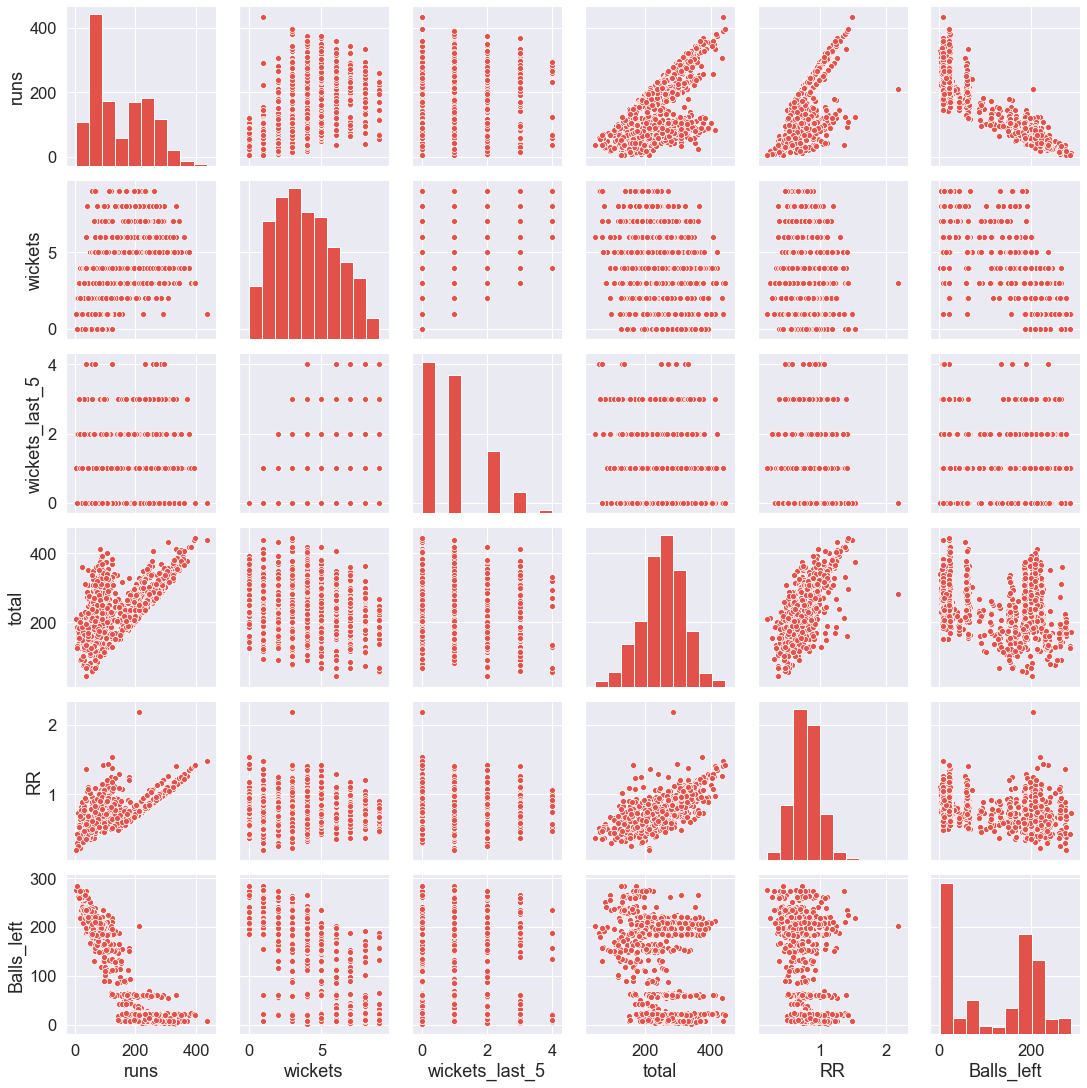

In [8]:
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
p = sns.pairplot(dataset.iloc[:,[7,8,11,14,16,17]])

In [9]:
X = dataset.iloc[:,[7,8,11,16,17]].values
y = dataset.iloc[:, 14].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

# Testing the dataset on trained model
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R square value:" , score)



R square value: 70.9977293226337


In [10]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,30))

Custom accuracy: 63.2996632996633


# Mean of Residuals
Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [11]:
import numpy as np
y_pred_train = lin.predict(X_train)
residuals = y_train-y_pred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.86288196491088e-14


# Check for Homoscedasticity¶
Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.
Detecting heteroscedasticity!
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

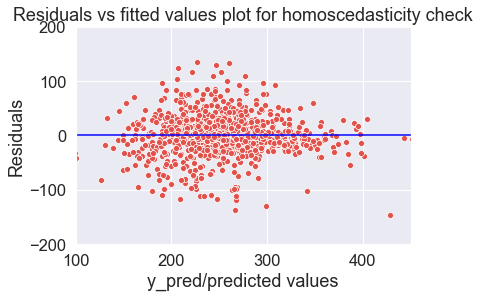

In [12]:
p = sns.scatterplot(y_pred_train,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-200,200)
plt.xlim(100,450)
p = sns.lineplot([100,450],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [13]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.8292420696558331), ('p-value', 0.9751354050163668)]

In [14]:
from scipy.stats import bartlett
test = bartlett(y_pred_train,residuals)
print(test)

BartlettResult(statistic=70.6691391752691, pvalue=4.2244939800466985e-17)


# 4. Check for Normality of error terms/residuals

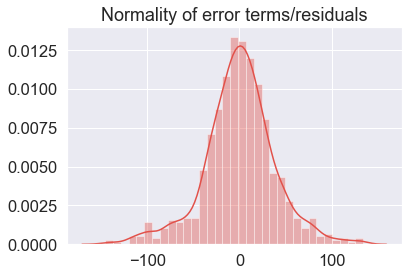

In [15]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# No autocorrelation of residuals¶
When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.
In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.
There should not be autocorrelation in the data so the error terms should not form any pattern

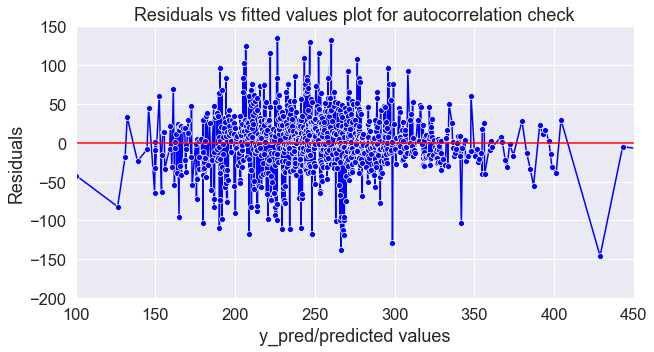

In [16]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred_train,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-200,150)
plt.xlim(100,450)
p = sns.lineplot([100,450],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

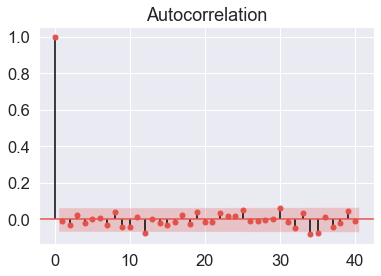

In [17]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

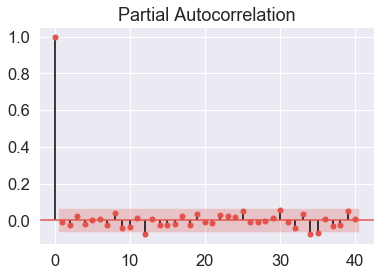

In [18]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

In [19]:
from statsmodels.stats.stattools import durbin_watson
g = np.array(residuals)
# Using statsmodels.durbin_watson() method
gfg = durbin_watson(g)
  
print(gfg)

2.015232444663234


In [20]:
print(f"intercept: {lin.intercept_}")

print(f"coefficients: {lin.coef_}")

intercept: 252.63299663299662
coefficients: [ 50.14203923 -31.94614987  -4.21063265  16.8221028    7.13864728]


In [21]:
X = sm.add_constant(X_train)

model = sm.OLS(y_train,X)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          1.54e-192
Time:                        09:55:24   Log-Likelihood:                -4520.7
No. Observations:                 891   AIC:                             9053.
Df Residuals:                     885   BIC:                             9082.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        252.6330      1.299    194.408      0.000     250.083     255.183
x1            50.1420      7.351      6.821      0.000      35.714      64.570
x2           -31.9461      2.541    -12.572      0.000     -36.933     -26.959
x3            -4.2106      1.557     -2.705      0.007      -7.266      -1.155
x4            16.8221      2.801      6.006      0.000      11.325      22.319
x5             7.1386      6.828      1.045      0.296      -6.263      20.540
==============================================================================
Omnibus:                       34.205   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.061
Skew:                          -0.165   Prob(JB):                     4.12e-18
Kurtosis:                       4.431   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
upper_appended=[]
lower_appended=[]
print("Old Shape: ", dataset.shape)
for columns in dataset[['runs','wickets','overs','runs_last_5','wickets_last_5','striker','non-striker','total','Balls','RR','Balls_left','WicketsLeft','AverageRunRate5','Actual_run_rate']].columns:
    #Detection
    # IQR
    print(columns)
    Q1 = np.percentile(dataset[columns], 25,interpolation = 'midpoint')
 
    Q3 = np.percentile(dataset[columns], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
 
    #Upper bound
    upper = np.where(dataset[columns] >= (Q3+1.5*IQR))
    upper= list(upper[0])
    # Lower bound
    lower = np.where(dataset[columns] <= (Q1-1.5*IQR))
    lower= list(lower[0])
    
    print(upper)
    print(lower)
    
    upper_appended=upper_appended+ upper
    lower_appended=lower_appended+ lower
    print(upper_appended)
    print(lower_appended)
    
    #Removing the Outliers


Old Shape:  (1188, 21)
runs
[]
[]
[]
[]
wickets
[]
[]
[]
[]
overs
[]
[]
[]
[]
runs_last_5
[68, 106, 328, 333, 419, 473, 569, 699, 704, 791, 792, 801, 803, 815, 822, 854, 895, 914, 918, 1020, 1021, 1025, 1033, 1074]
[]
[68, 106, 328, 333, 419, 473, 569, 699, 704, 791, 792, 801, 803, 815, 822, 854, 895, 914, 918, 1020, 1021, 1025, 1033, 1074]
[]
wickets_last_5
[19, 38, 51, 77, 93, 98, 111, 116, 149, 163, 177, 178, 191, 206, 248, 255, 258, 265, 276, 286, 316, 321, 347, 348, 356, 379, 404, 431, 433, 438, 447, 453, 465, 469, 475, 485, 493, 501, 517, 562, 567, 571, 575, 629, 654, 683, 691, 733, 765, 768, 810, 816, 830, 864, 880, 889, 900, 933, 937, 957, 970, 984, 1007, 1036, 1037, 1054, 1056, 1059, 1093, 1150, 1158, 1159, 1161, 1172, 1179]
[]
[68, 106, 328, 333, 419, 473, 569, 699, 704, 791, 792, 801, 803, 815, 822, 854, 895, 914, 918, 1020, 1021, 1025, 1033, 1074, 19, 38, 51, 77, 93, 98, 111, 116, 149, 163, 177, 178, 191, 206, 248, 255, 258, 265, 276, 286, 316, 321, 347, 348, 356, 379, 404,

In [23]:
upper_appended_list = list(dict.fromkeys(upper_appended))
print(upper_appended_list)

[68, 106, 328, 333, 419, 473, 569, 699, 704, 791, 792, 801, 803, 815, 822, 854, 895, 914, 918, 1020, 1021, 1025, 1033, 1074, 19, 38, 51, 77, 93, 98, 111, 116, 149, 163, 177, 178, 191, 206, 248, 255, 258, 265, 276, 286, 316, 321, 347, 348, 356, 379, 404, 431, 433, 438, 447, 453, 465, 469, 475, 485, 493, 501, 517, 562, 567, 571, 575, 629, 654, 683, 691, 733, 765, 768, 810, 816, 830, 864, 880, 889, 900, 933, 937, 957, 970, 984, 1007, 1036, 1037, 1054, 1056, 1059, 1093, 1150, 1158, 1159, 1161, 1172, 1179, 0, 48, 129, 159, 204, 219, 230, 355, 360, 390, 392, 399, 451, 524, 551, 554, 594, 616, 672, 690, 714, 717, 761, 814, 855, 865, 911, 928, 963, 971, 977, 994, 1024, 1026, 1068, 1098, 1107, 1138, 1147, 1174, 7, 71, 146, 205, 226, 234, 236, 253, 262, 266, 277, 280, 303, 315, 323, 374, 478, 488, 642, 754, 775, 777, 846, 849, 952, 966, 988, 1001, 1002, 1008, 1052, 1062, 1075, 1088, 1099, 1134, 180, 285, 449, 502]


In [24]:
lower_appended_list = list(dict.fromkeys(lower_appended))
print(lower_appended_list)

[98, 126, 130, 224, 338, 417, 452, 469, 654, 729, 731, 851, 864, 388, 853, 945, 395, 414, 1101]


In [25]:
# upper_appended_list_rem = []
# for e in upper_appended_list:
#     if e not in (433,854 ,692 ,665,1103 ,540 ,779 ,809,1018,1033,1034  ,45 ,276):
#         upper_appended_list_rem.append(e)

lower_appended_list = list(dict.fromkeys(lower_appended))
lower_appended_list_rem = []
for e in lower_appended_list:
    if e not in (98,469,654,864):
        lower_appended_list_rem.append(e)

# upper_appended_list=upper_appended_list.remove(433,854 ,692 ,665,1103 ,540 ,779 ,809,1018,1033,1034  ,45 ,276)
# upper_appended_list=upper_appended_list-[433,854 ,692 ,665,1103 ,540 ,779 ,809,1018,1033,1034  ,45 ,276]
dataset.drop(upper_appended_list, inplace = True)
dataset.drop(lower_appended_list_rem, inplace = True)
# dataset.reset_index(inplace = True)
    
print("New Shape: ", dataset.shape)

New Shape:  (994, 21)


In [26]:
X = dataset.iloc[:,[7,8,11,16,17]].values
y = dataset.iloc[:, 14].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

# Testing the dataset on trained model
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R square value:" , score)

R square value: 57.16538120709056


In [27]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

X = dataset.iloc[:,[7,8,9,10,11,12,13,15,16,17,18,19]]
y = dataset.iloc[:, 14]
forward_selection(X,y)

['RR', 'non-striker', 'WicketsLeft', 'runs', 'wickets']